<a href="https://colab.research.google.com/github/anajikadam/LinearRegressionModel/blob/main/LinearRegression_Assumptions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression vs. Generalized linear models (GLM)


## Linear Regression Definition
Linear Regression is a modelling approach that assumes a linear relationship between an output (a.k.a. “dependent variables”) and one or more inputs (a.k.a. “independent variables”).


## Assumptions for Linear Regression
Linear relationship between inputs(s) and output
Output variable is continuous and unbounded
Residuals are normally distributed (or follows student-t distribution, if you want to allow for greater variance). Residuals are also called “errors” as they measure how well the regression line fits the data.

# Generalized Linear Model (GLM) Definition
As the name indicates, GLM is a generalized form of linear regressions. It is more flexible than linear regression because:

- GLM works when the output variables are not continuous.
- GLM allows changes in unconstrained inputs to affect the output variable on an appropriately constrained scale

- example:

Imagine that you want to model the number of Covid cases based on the number of population in an area. This output variable is constrained, as the number of Covid cases must be a non-negative integer. This makes it hard for you to use linear regression to model the data because assumptions that the output variable should continuous and unbounded is violated. However, you can use GLM in this case and test the effect of input variable (number of population) on the output variable (number of Covid cases), regardless of what sort of scale the output variable is measured on.

# Assumptions for GLM
- Input variable(s) is continuous and unbounded
- Output variables could be any of the following:
- binary outcome (e.g. Did person X contract a specific disease)
- count variable (e.g. Number of people who contracted a disease)
- waiting time (e.g. Number of days disease is spread from one person to another)
- probability vector (e.g. probability that person X contracted a disease)
3. Residuals are normally distributed

In [ ]:
# Python Example of linear regression and generalized linear model

import numpy as np
from sklearn.linear_model import LinearRegression
# generate some data
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6]).reshape((-1, 1))
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
# fit linear regression model on data
model = LinearRegression()
model.fit(x, y)

import numpy as np
from sklearn.linear_model import LinearRegression
# generate some data
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6]).reshape((-1, 1))
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
# fit linear regression model on data
model = LinearRegression()
model.fit(x, y)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
# generate some data
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6]).reshape((-1, 1))
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
# fit linear regression model on data
model = LinearRegression()
model.fit(x, y)

Show intercept and coefficient. The intercept value = 103.10 (approximately) illustrates that your model predicts the response 103.10 when 𝑥 is zero. The coefficient value = -1.75 means that the predicted output decreases by 1.75 when 𝑥 is increased by one.

# Generalized Linear Model (GLM): using statsmodel library

[linl](https://anyi-guo.medium.com/linear-regression-vs-generalized-linear-models-glm-whats-the-difference-a6bf78d2c968)



In [ ]:
import numpy as np
import statsmodels.api as sm
# using the same data from the linear regression model above
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6]).reshape((-1, 1))
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
# fit data to GLM model
model = sm.GLM(y,x) # Default is Normal distribution, a.k.a. Gaussian. To specify the binomial distribution, use family = sm.family.Binomial()
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   13
Model:                            GLM   Df Residuals:                       12
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                          2539.8
Method:                          IRLS   Log-Likelihood:                -68.885
Date:                Tue, 13 Jun 2023   Deviance:                       30478.
Time:                        12:32:27   Pearson chi2:                 3.05e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             -1.426
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.8484      1.624      5.448      0.0

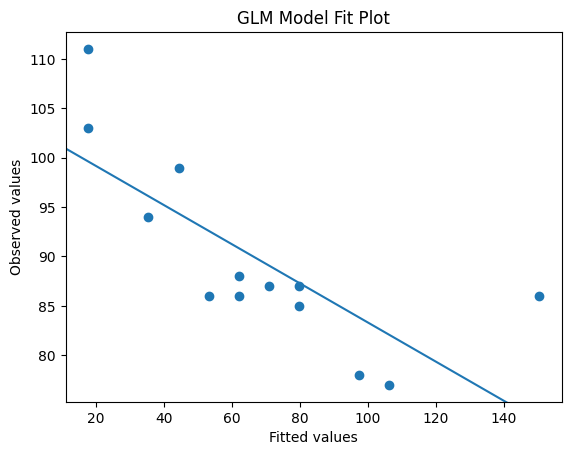

In [ ]:
# Compare the expected value from the GLM model vs. the actual values

import matplotlib.pyplot as plt
from statsmodels.graphics.api import abline_plot

nobs = results.nobs # number of observations
yhat = results.mu # predicted value from the GLM model
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
ax.set_title('GLM Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values')
plt.show()

https://www.youtube.com/watch?v=_XAurJJQ7jw

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/linear-regression-assumptions/main/data.csv')

In [ ]:
df.shape

(200, 4)

In [ ]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [ ]:
df.columns

Index(['feature1', 'feature2', 'feature3', 'target'], dtype='object')

In [ ]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

# Independence of observations

In [ ]:
df.duplicated().sum()

0

# 1. Linear Relationship

Linear regression needs the relationship between the independent and dependent variables to be linear.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


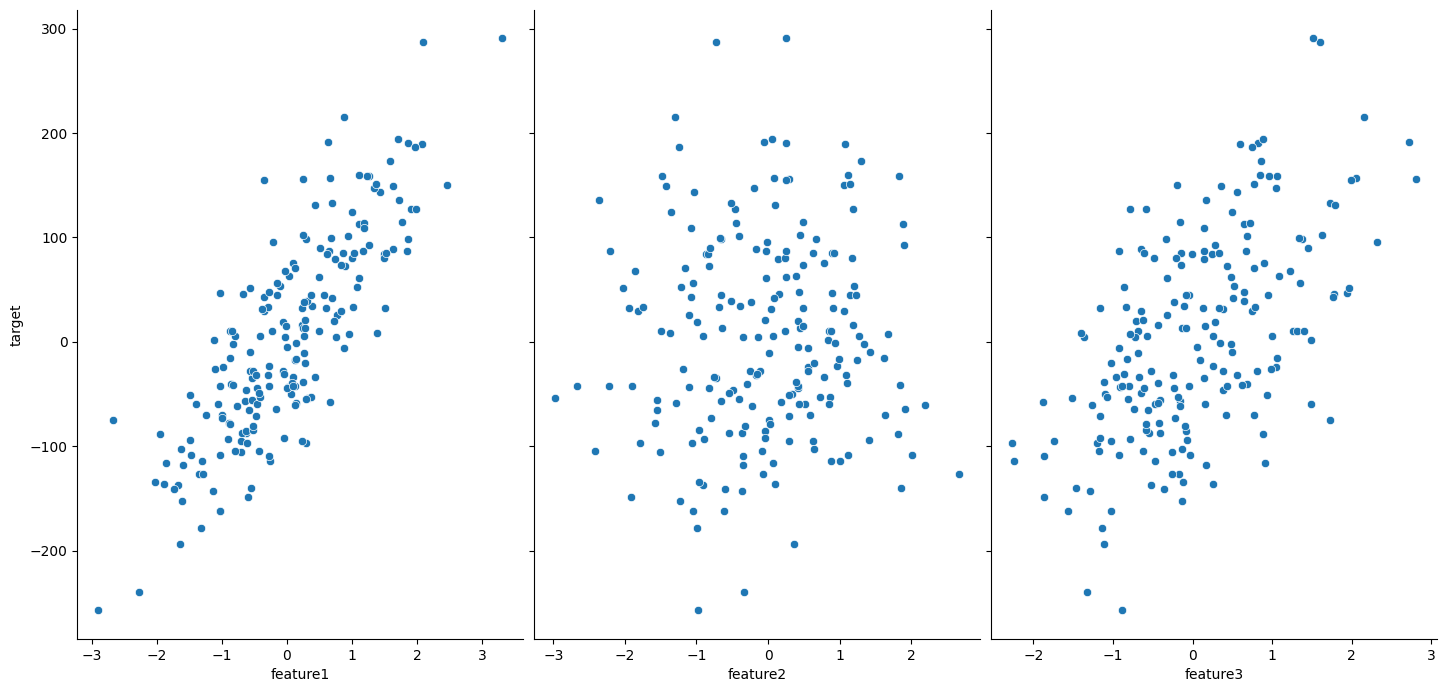

In [ ]:
sns.pairplot(df, x_vars=['feature1', 'feature2', 'feature3'], y_vars='target', size=7, aspect=0.7)

A tip is to remember to always see the plots from where the dependent variable is on the y axis. Though it wouldn't vary the shape much but that's how linear regression's intuition is, to put the dependent variable as y and independents as x(s).

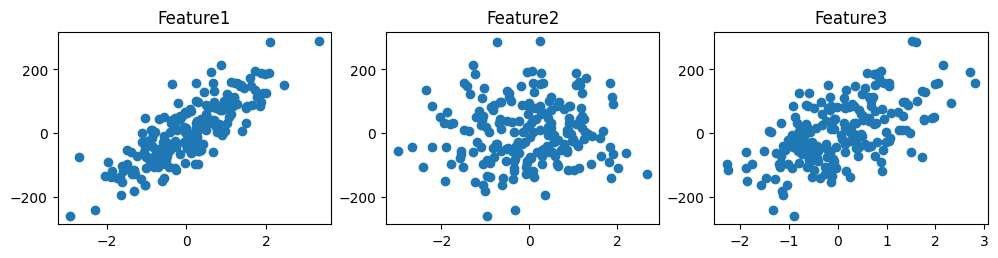

In [ ]:

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

# 2. Multicollinearity


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [ ]:

pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<Axes: >

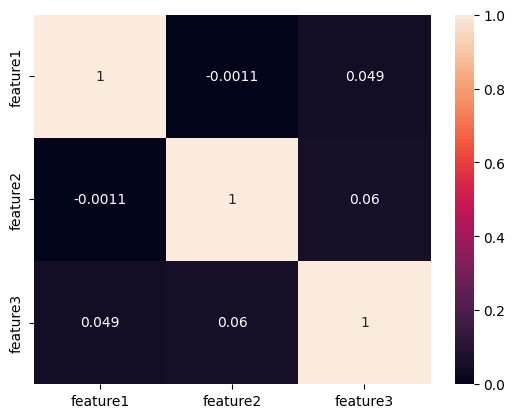

In [ ]:
# Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

# 3. Normality of Residual

## Mean of Residual
Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [ ]:

mean_residuals = np.mean( residual )
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.2335728033469458


Very close to 0, so all good here

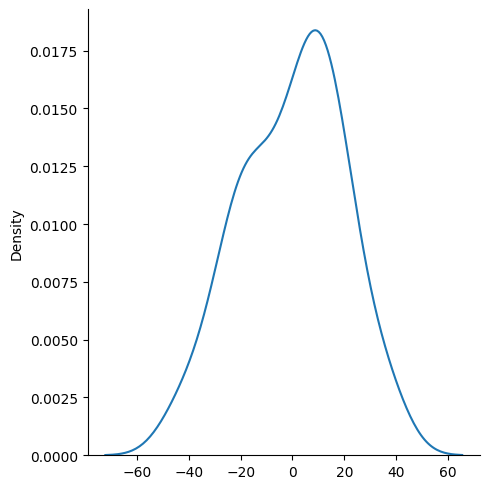

In [ ]:

sns.displot(residual,kind='kde')

## Normally distributed

## probplot (Probability plot)

Same as a Q-Q plot, however probabilities are shown in the scale of the theoretical distribution (x-axis) and the y-axis contains unscaled quantiles of the sample data.

https://towardsdatascience.com/explaining-probability-plots-9e5c5d304703


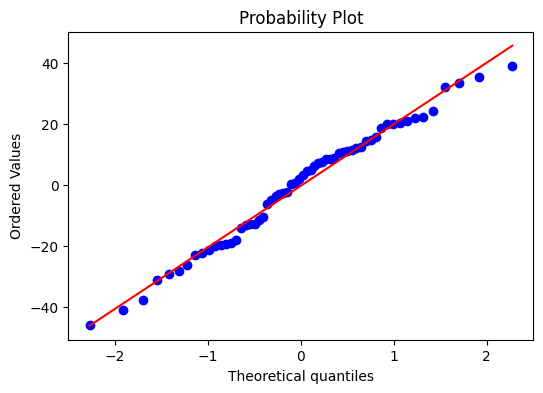

In [ ]:
from scipy.stats import probplot

fig, ax = plt.subplots(figsize=(6,4))
probplot(residual, plot=ax, )
plt.show()

Text(0.5, 1.0, 'Statsmodels')

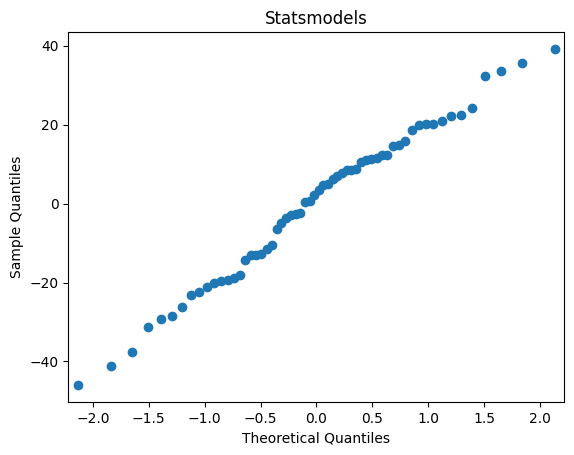

In [ ]:
import statsmodels.api as sm

sm.qqplot(residual)
plt.title("Statsmodels")

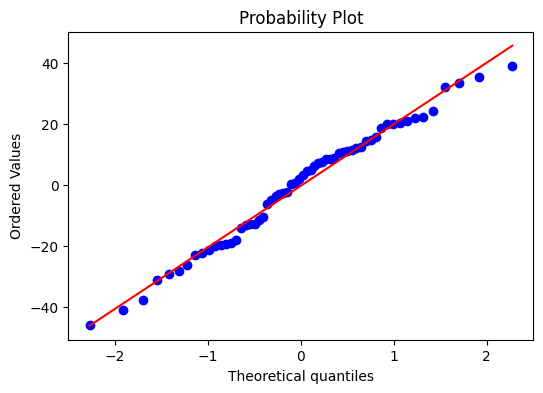

In [ ]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

# 4. Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

In [ ]:
sns.lineplot()

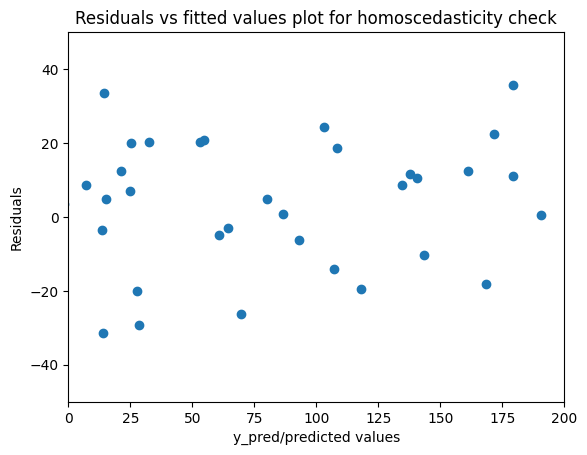

In [ ]:
p = plt.scatter(y_pred,residual)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-50,50)
plt.xlim(0,200)
# p = plt.plot(y_pred)
# p = sns.lineplot(y_pred) #[0,201],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

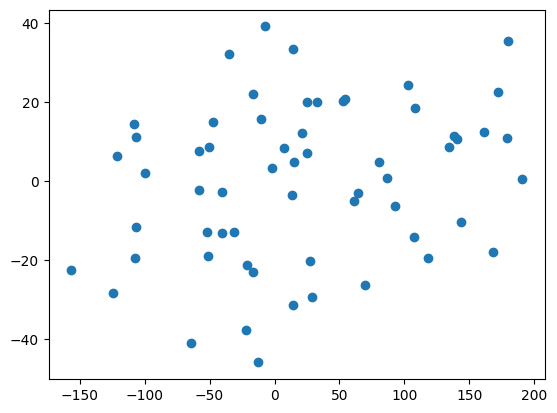

In [ ]:

plt.scatter(y_pred, residual)

## Applying tests:
If we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. Remember, a researcher or data scientist would always aim to reject the null hypothesis.

## Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

- Null Hypothesis: Error terms are homoscedastic
- Alternative Hypothesis: Error terms are heteroscedastic.


## Bartlett’s test
tests the null hypothesis that all input samples are from populations with equal variances.
Bartlett's test is used to test if k samples have equal variances. Equal variances across samples is called homogeneity of variances. Some statistical tests, for example the analysis of variance, assume that variances are equal across groups or samples.


In [ ]:
residual.shape

(60,)

In [ ]:
X_train.shape


(140, 3)

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_test)
lzip(name, test)

[('F statistic', 0.6654805297224233), ('p-value', 0.8519311042230993)]

Since p value is less than 0.05 in Goldfeld Quandt Test, we can reject it's null hypothesis that error terms are homoscedastic. Good
Here p-value is greater then accept Null Hypothesis that is Error term are Homoscadastic. assumption True.

https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression

In [ ]:
y_test.shape

(60,)

In [ ]:
from scipy.stats import bartlett
test = bartlett( y_test, residual)
print(test)

BartlettResult(statistic=107.7038135317692, pvalue=3.121014896216253e-25)


# 5. Autocorrelation of Residuals

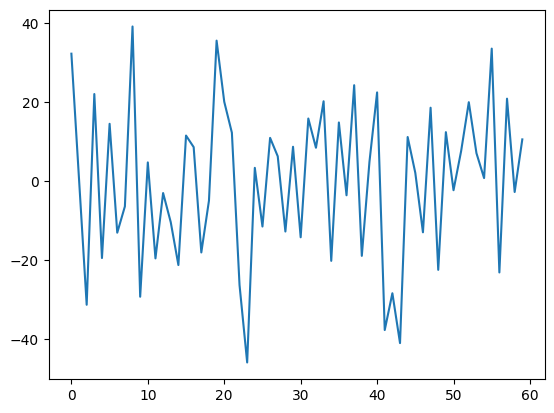

In [ ]:

plt.plot(residual)

# Types Of Linear Regression

### **Multiple Linear Regression**


Linear regression, often known as simple regression, creates a relationship between two variables. Linear regression is represented visually as a straight line, with the slope determining how a change in one variable affects a change in the other. A linear regression relationship's y-intercept reflects one variable's value when the other's value is 0.

Multiple linear regression estimates the relationship between two or more independent variables and one dependent variable.
$$\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$$

where $p$ is... number of features in the model.

* For any given independent variable (x) value, y is the dependent variable's predicted value for the dependent variable (y).
* $\beta_0$ represents the intercept, or the predicted value of y, when x is 0.
* $\beta_1$ is the regression coefficient of variable $x_1$, which tells us how much y will change as $x_1$ increases or decreases.
* $\beta_p$is the regression coefficient of the last variable $x_p$, which tells us how much y will change as $x_p$ increases or decreases.
* $x_1$ ... $x_p$ are the independent or predictor variables that help us predict y
* $\epsilon$ is the error left due to the incorrect calculation of the regression coefficients.


### **Linear regression assumptions**

A linear regression model has the following assumptions:

1. **Independence of observations:** Different observations are not related.
2. **Linearity:** A linear relationship between the target and features.
3. **Independence:** Little or no collinearity between features.
4. **Normality of residuals:** The residuals are normally distributed.
5. **Homoscedasticity:** The residuals have the same variance across values of the target.

Note that:

* Assumption 1 is true for this dataset, as a given beneficiary's health cost charge should not be related to another.
* We'll use assumptions 2-3 to inform how we process the data.
* We'll use assumptions 4-5 to check our linear model is fit for purpose.

### **Errors in Regression**

The regression line regress towards the mean to create the best fit which essentially means that the errors are at the lowest. In the above plot, it is visible that the regression line is not able to exactly predict the true values. There is always going to be some space for errors.

Let's understand the various errors in Regression:


* The mean absolute error (MAE) is the most basic regression error statistic to grasp. We'll compute the residual for each data point individually, using only the absolute value of each so that negative and positive residuals don't cancel out. The average of all these residuals is then calculated. MAE essentially describes the typical magnitude of the residuals. <br>
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$

* The mean square error (MSE) is identical to the mean absolute error (MAE) but squares the difference before aggregating all of them. The MSE will nearly always be greater than the MAE because we are squaring the difference. Because of this, we are unable to directly compare the MAE and MSE. We are limited to comparing the error metrics of our model to those of a rival model. The presence of outliers in our data makes the square term's impact on the MSE equation very clear. In MAE, each residual adds proportionally to the overall error, whereas in MSE, the error increases quadratically. As a result, our data outliers will ultimately result in a considerably bigger total error in the MSE than they will in the MAE. Similarly to this, our model will suffer more if it predicts values that are significantly different from the matching actual value.
This means that in MSE as opposed to MAE, substantial disparities between actual and predicted values are punished more severely. <br>If we wish to limit the importance of outliers, we should use MAE because outlier residuals do not contribute as much to overall error as MSE. Finally, the decision between MSE and MAE is application-specific and depends on how large errors need to be handled.

$$MSE= \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$


* The root mean squared error (RMSE) is another error statistic you may come upon. It is the square root of the MSE, as the name implies. Because the MSE is squared, its units differ from the original output. RMSE is frequently used to transform the error metric back into comparable units, making interpretation easier. Outliers have a comparable effect on the MSE and RMSE because they both square the residual.

$$RMSE= \sqrt(\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2)$$


* The percentage counterpart of MAE is the mean absolute percentage error (MAPE). Just as MAE is the average amount of error created by your model, MAPE is the average distance between the model's predictions and their associated outputs. MAPE, like MAE, has a clear meaning because percentages are easier for people to understand. Because of the use of absolute value, MAPE and MAE are both resistant to the effects of outliers.

$$MAPE= \frac{100\%}{n}\ \sum_{i=1}^{n}\left| \frac{y-\hat y}{y} \right|$$

### **Model Comparisons**

* $R^2$: The $R^2$ or the coefficient of determination is the proportion of the variance in the dependent variable that is explained from the independent variable(s). $R^2$ is expressed between 0 and 1 for the level of variance explained.
As we learned in the previous section, the ratio $\frac{SSE}{TSS}$ should be low for a robust model, this ratio signifies the error or unexplained variance by the independent variable(s).
Mathematically, $R^2$ or explained variance can be expressed as:

$$ R^2 = 1 - \frac{SSE}{TSS} $$

* Adjusted $R^2$: For linear models, adjusted $R^2$ is a corrected goodness-of-fit statistic. It determines the proportion of variance in the target field explained by the input or inputs.
$R^2$ tends to overestimate the goodness-of-fit of the linear regression. It always grows as the number of independent variables in the model grows.
It happens because we tend to deduct a large amount (due to multiple variables) to calculate error as the number of independent variables increases. Hence, the ratio $\frac{SSE}{TSS}$ is even lower than it should be and  $R^2$ seems to be high but it might not be an appropriate model for production data. It is adjusted to account for this overestimation. Considering N as the total sample size and p as the number of independent variables, adjusted $R^2$ can be expressed as:

$$ \text{Adjusted }  R^2 = 1 - \frac{(1 - R^2)(N - 1)}{N - p - 1} $$

#### **Need Transformation of the target**

We saw in the **EDA** section that the target was not normally distributed. A model trained using this target will likely produce residuals that **do not** have the same variance across values of the target (i.e. assumption 5 of the linear regression model will be violated).

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

So we'll use the **Yeo-Johnson** transformation to ensure our target is more normally distributed:

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
y_train_t = pt.fit_transform(y_train.values.reshape(-1, 1))[:, 0]
y_test_t = pt.transform(y_test.values.reshape(-1, 1))[:, 0]